In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Split Dataset into Train and Text
from sklearn.model_selection import train_test_split
# TF-IDF (Feature Engineering)
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Other packages
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Reading the processed pickle file using the read_pickle()  method  [train.pkl - for the train dataset] [test.pkl for the test dataset]

In [6]:
train = pd.read_pickle('train.pkl')
train

,hmid,moment,social,agency
0,27674,i happy my son got marks his examination,1,0
1,27685,went movies my friends it fun,1,1
2,27691,hot kiss my girl friend last night made my day,1,1
3,27701,my son woke me fantastic breakfast eggs his sp...,1,0
4,27712,my older daughter keeps patting my younger dau...,1,0
...,...,...,...,...
10555,128748,my husband called me tell me he loved me,1,0
10556,128753,i worked always makes me feel good,0,1
10557,128754,finally got watch new resident evil movie,0,1
10558,128757,i got talk old friend reminisce good times,1,1


In [7]:
test = pd.read_pickle('test.pkl')
test 

,hmid,moment,social,agency
0,0,i able spend day my fiance shopping yesterday,0,1
1,1,i able play my cat,0,1
2,2,i able clean my room gold my laundry,0,1
3,3,i spend day party beach i happy see friends i ...,1,1
4,4,my cat greeting me i got home work she sweet c...,0,0
...,...,...,...,...
17210,21892,my wife i went hike last week we became amazin...,1,1
17211,21893,i finally hit platinum rank overwatch,0,1
17212,21897,one my long time friends i finally acknowledge...,1,1
17213,21898,i earned professional certification,0,1


### Exracting train and test columns 

'moment' columns is used as the X_feature and 'social' and 'agency' columns as the Y_features

In [8]:
x_train_features = train['moment']
display(x_train_features.head())

y_train_social = train['social']
y_train_agency = train['agency']
display(y_train_social.head())
display(y_train_agency.head())

0            i happy my son got marks his examination 
1                       went movies my friends it fun 
2      hot kiss my girl friend last night made my day 
3    my son woke me fantastic breakfast eggs his sp...
4    my older daughter keeps patting my younger dau...
Name: moment, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: social, dtype: int64

0    0
1    1
2    1
3    0
4    0
Name: agency, dtype: int64

In [9]:
x_test_features = test['moment']
display(x_test_features.head())

y_test_social = test['social']
y_test_agency = test['agency']
display(y_test_social.head())
display(y_test_agency.head())

0       i able spend day my fiance shopping yesterday 
1                                  i able play my cat 
2                i able clean my room gold my laundry 
3    i spend day party beach i happy see friends i ...
4    my cat greeting me i got home work she sweet c...
Name: moment, dtype: object

0    0
1    0
2    0
3    1
4    0
Name: social, dtype: int64

0    1
1    1
2    1
3    1
4    0
Name: agency, dtype: int64

### Using CountVectorizer for feature extraction

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=u"(?u)\\b\\w+\\b", ngram_range=(1,2))
vectorizer.fit(x_train_features)
# vectorizer.vocabulary_

{'i': 20444,
 'happy': 18080,
 'my': 28270,
 'son': 39605,
 'got': 16839,
 'marks': 25896,
 'his': 19349,
 'examination': 12075,
 'i happy': 20822,
 'happy my': 18207,
 'my son': 29020,
 'son got': 39660,
 'got marks': 17039,
 'marks his': 25898,
 'his examination': 19401,
 'went': 46841,
 'movies': 28022,
 'friends': 14834,
 'it': 22197,
 'fun': 15108,
 'went movies': 47024,
 'movies my': 28033,
 'my friends': 28587,
 'friends it': 14911,
 'it fun': 22297,
 'hot': 19929,
 'kiss': 23201,
 'girl': 15979,
 'friend': 14651,
 'last': 23519,
 'night': 30316,
 'made': 25302,
 'day': 8959,
 'hot kiss': 19942,
 'kiss my': 23208,
 'my girl': 28598,
 'girl friend': 15988,
 'friend last': 14728,
 'last night': 23560,
 'night made': 30378,
 'made my': 25408,
 'my day': 28464,
 'woke': 47740,
 'me': 26093,
 'fantastic': 12662,
 'breakfast': 4272,
 'eggs': 11170,
 'special': 39974,
 'hamburger': 17960,
 'patty': 32256,
 'pancakes': 31819,
 'son woke': 39769,
 'woke me': 47758,
 'me fantastic': 26238

In [11]:
x_train = vectorizer.fit_transform(x_train_features).toarray()
x_test = vectorizer.transform(x_test_features).toarray()

display(x_train)
display(x_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### The following are the functions that will be used to evaluate various models and get results for them

The following function is used to get the Accuracy, Precision, F1 and Recall scores

In [47]:
def getResults(y_test, model_prediction):
    accuracy = accuracy_score(y_test, model_prediction)
    precision = precision_score(y_test, model_prediction)
    f1 = f1_score(y_test, model_prediction)
    recall = recall_score(y_test, model_prediction)
    print(f'Accuracy : {accuracy}\nPrecision : {precision}\nF1_score : {f1}\nRecall : {recall}\n')
    
    print("===== CONFUSION MATRIX =====")
    cf_matrix = confusion_matrix(y_test_social, model_prediction)
    print(cf_matrix)
    
    return accuracy, precision, f1, recall

The following function is used to train the model based on the parameters passed to it
 - For the first instance, we are training the model for social labels and parameteres are passed accordingly
 - The next instance, we are training the model for agency labels and parameters are passed accordingly

In [48]:
def trainModel(model, x_train, y_train, x_test, y_test, name):
    print(f'\n==== Testing : {model.__class__} for {name} ====')
    # fit the data
    model.fit(x_train, y_train)
    
    # prediction
    prediction = model.predict(x_test)
    
    # getResults 
    results = getResults(y_test, prediction)
    return results

## Trying Various Methods

### 1. SGD

SGD on Social label

In [49]:
# Model
sgd = SGDClassifier()

# Calling the trainModel to get the results
social_result_sgd = trainModel(sgd, x_train, y_train_social, x_test, y_test_social, "Social Label")


==== Testing : <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> for Social Label ====
Accuracy : 0.8981702004066221
Precision : 0.9446225268044656
F1_score : 0.906977978243566
Recall : 0.8722188201673811

===== CONFUSION MATRIX =====
[[6916  501]
 [1252 8546]]


SGD on Agency label

In [50]:
agency_result_sgd = trainModel(sgd, x_train, y_train_agency, x_test, y_test_agency, "Agency Label")


==== Testing : <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> for Agency Label ====
Accuracy : 0.7892535579436538
Precision : 0.8178768450872224
F1_score : 0.8581149784904184
Recall : 0.9025172754195459

===== CONFUSION MATRIX =====
[[ 716 6701]
 [3085 6713]]


### 2. Logistic Regression

Logistic Regression on Social label

In [51]:
# Model
lr = LogisticRegression()

# Calling the trainModel to get the results
social_result_lr = trainModel(lr, x_train, y_train_social, x_test, y_test_social, "Social Label")


==== Testing : <class 'sklearn.linear_model._logistic.LogisticRegression'> for Social Label ====
Accuracy : 0.8998547778100494
Precision : 0.9398561778165178
F1_score : 0.9091483979763911
Recall : 0.8803837517860787

===== CONFUSION MATRIX =====
[[6865  552]
 [1172 8626]]


Logistic Regression on Agency label

In [52]:
agency_result_lr = trainModel(lr, x_train, y_train_agency, x_test, y_test_agency, "Agency Label")


==== Testing : <class 'sklearn.linear_model._logistic.LogisticRegression'> for Agency Label ====
Accuracy : 0.8052860877142027
Precision : 0.8299850074962519
F1_score : 0.8685283966112332
Recall : 0.9108259295820994

===== CONFUSION MATRIX =====
[[ 612 6805]
 [3263 6535]]



### 3. Linear SVC

Linear SVC on Social label

In [53]:
# Model 
svc = LinearSVC()

# Calling the trainModel to get the results
social_result_svc = trainModel(svc, x_train, y_train_social, x_test, y_test_social, "Social Label")


==== Testing : <class 'sklearn.svm._classes.LinearSVC'> for Social Label ====
Accuracy : 0.8975312227708394
Precision : 0.9365355357530971
F1_score : 0.9071578947368422
Recall : 0.879567258624209

===== CONFUSION MATRIX =====
[[6833  584]
 [1180 8618]]


Linear SVC on Agency label

In [54]:
agency_result_svc = trainModel(svc, x_train, y_train_agency, x_test, y_test_agency, "Agency Label")


==== Testing : <class 'sklearn.svm._classes.LinearSVC'> for Agency Label ====
Accuracy : 0.7912866686029625
Precision : 0.8316678286466807
F1_score : 0.8566527029722721
Recall : 0.8831852583086541

===== CONFUSION MATRIX =====
[[ 827 6590]
 [3479 6319]]


### 4. Random Forest

Random Forest on Social label

In [55]:
# model
rf = RandomForestClassifier() 

# Calling the trainModel to get the results
social_result_rf = trainModel(rf, x_train, y_train_social, x_test, y_test_social, "Social Label")


==== Testing : <class 'sklearn.ensemble._forest.RandomForestClassifier'> for Social Label ====
Accuracy : 0.8914318907929132
Precision : 0.9335155822854019
F1_score : 0.9013355857044819
Recall : 0.8713002653602776

===== CONFUSION MATRIX =====
[[6809  608]
 [1261 8537]]


Random Forest on Agency label

In [56]:
agency_result_rf = trainModel(rf, x_train, y_train_agency, x_test, y_test_agency, "Agency Label")


==== Testing : <class 'sklearn.ensemble._forest.RandomForestClassifier'> for Agency Label ====
Accuracy : 0.7892535579436538
Precision : 0.7964817132526769
F1_score : 0.8632903760645112
Recall : 0.9423330042777229

===== CONFUSION MATRIX =====
[[ 274 7143]
 [2559 7239]]


### 5. KNN

KNN on Social label

In [57]:
# Model
knn = KNeighborsClassifier()

# Calling the trainModel to get the results
social_result_knn = trainModel(knn, x_train, y_train_social, x_test, y_test_social, "Social Label")


==== Testing : <class 'sklearn.neighbors._classification.KNeighborsClassifier'> for Social Label ====
Accuracy : 0.7476038338658147
Precision : 0.9287623840226451
F1_score : 0.7310763136720927
Recall : 0.6027760767503573

===== CONFUSION MATRIX =====
[[6964  453]
 [3892 5906]]


KNN on Agency label

In [58]:
agency_result_knn = trainModel(knn, x_train, y_train_agency, x_test, y_test_agency, "Agency Label")


==== Testing : <class 'sklearn.neighbors._classification.KNeighborsClassifier'> for Agency Label ====
Accuracy : 0.7564914318907929
Precision : 0.7654666666666666
F1_score : 0.8456326410369717
Recall : 0.9445541296479105

===== CONFUSION MATRIX =====
[[ 321 7096]
 [1894 7904]]


### Visualising the findings

<Figure size 432x288 with 0 Axes>

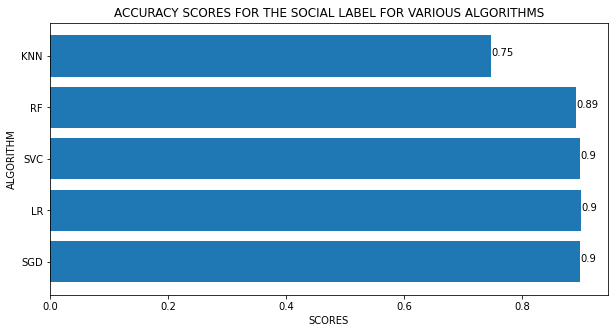

In [107]:
fig = plt.figure()
fig = plt.figure(figsize = (10, 5))
methods = ['SGD', 'LR', 'SVC', 'RF', 'KNN']
scores = [social_result_sgd[0], social_result_lr[0], social_result_svc[0], social_result_rf[0], social_result_knn[0]]
plt.ylabel("ALGORITHM")
plt.xlabel("SCORES")
plt.barh(methods,scores)
plt.title("ACCURACY SCORES FOR THE SOCIAL LABEL FOR VARIOUS ALGORITHMS")
for index, value in enumerate(scores):
    plt.text(value, index, str(round(value, 2)))
plt.show()

<Figure size 432x288 with 0 Axes>

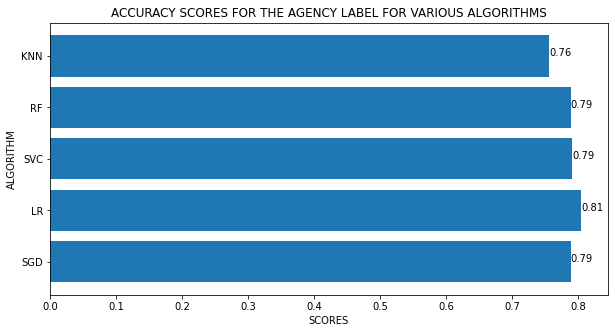

In [106]:
fig = plt.figure()
fig = plt.figure(figsize = (10, 5))
methods = ['SGD', 'LR', 'SVC', 'RF', 'KNN']
scores = [agency_result_sgd[0], agency_result_lr[0], agency_result_svc[0], agency_result_rf[0], agency_result_knn[0]]
plt.ylabel("ALGORITHM")
plt.xlabel("SCORES")
plt.barh(methods,scores)
plt.title("ACCURACY SCORES FOR THE AGENCY LABEL FOR VARIOUS ALGORITHMS")
best_score = {}
for index, value in enumerate(scores):
    plt.text(value, index, str(round(value, 2)))
plt.show()

## Logistic Regression and Stochastic gradient descent were tuned further for analysis

#### These were the top performing algorithms

In [76]:
from sklearn.model_selection import GridSearchCV

### Fine Tuning the SGD model

Hypertuning on the SOCIAL label

In [86]:
# modelSGD = SGDClassifier()
# params = [{
#     "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
#     "alpha" : [0.0001, 0.001, 0.01, 0.1],
#     "penalty" : ["l2", "l1", "elasticnet"]
# }]

# sgd_gs = GridSearchCV(modelSGD, param_grid=params, scoring= 'accuracy', verbose=10, cv = 2)
# sgd_gs.fit(x_train, y_train_social)
# print(sgd_gs.best_score_)
# print(sgd_gs.best_estimator_)
# print(sgd_gs.best_params_)

# # save your model or results
# joblib.dump(sgd_gs, 'SGD_GS_Social.pkl')

Hypertuning on the AGENCY label

In [87]:
# modelSGD = SGDClassifier()
# params = [{
#     "loss" : ["hinge", "log", "modified_huber"],
#     "alpha" : [0.0001, 0.001, 0.01, 0.1],
#     "penalty" : ["l2", "l1", "elasticnet"]
# }]

# sgd_gs = GridSearchCV(modelSGD, param_grid=params, scoring= 'accuracy', verbose=10, cv = 2)
# sgd_gs.fit(x_train, y_train_agency)

# print(sgd_gs.best_score_)
# print(sgd_gs.best_estimator_)
# print(sgd_gs.best_params_)

# # save your model or results
# joblib.dump(sgd_gs, 'SGD_GS_Agency.pkl')

#### Loading the huypertuned SGD model

SOCIAL label 

In [96]:
#load your model for further usage
sgd_social_hp = joblib.load("SGD_GS_Social.pkl")
print(f'Best Parameters : {sgd_social_hp.best_params_}')

Best Parameters : {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'elasticnet'}


In [97]:
#  Try to predict data using this hypertuned method
sgd_gs_pred = sgd_social_hp.predict(x_test)

# Print the results 
social_result_sgd_hp = getResults(y_test_social,sgd_gs_pred)

Accuracy : 0.9015393552134766
Precision : 0.9619199635161327
F1_score : 0.9087188324627068
Recall : 0.8610941008369055

===== CONFUSION MATRIX =====
[[7083  334]
 [1361 8437]]


AGENCY Label

In [98]:
#load your model for further usage
sgd_agency_hp = joblib.load("SGD_GS_Agency.pkl")
print(f'Best Parameters : {sgd_agency_hp.best_params_}')

Best Parameters : {'alpha': 0.01, 'loss': 'modified_huber', 'penalty': 'l2'}


In [99]:
#  Try to predict data using this hypertuned method
sgd_gs_pred = sgd_agency_hp.predict(x_test)

# Print the results 
agency_result_sgd_hp = getResults(y_test_agency,sgd_gs_pred)

Accuracy : 0.8044728434504792
Precision : 0.8217894274417924
F1_score : 0.8696056403501975
Recall : 0.9233300427772293

===== CONFUSION MATRIX =====
[[ 425 6992]
 [3132 6666]]


### Fine Tuning Logistic Regression

Hypertuning on the SOCIAL label

In [28]:
# # Model Selection Accuracy
# modelLR = LogisticRegression()

# params = [{
#     'C': [0.001, 0.01, 0.1, 1, 10],
#     "penalty" : ["l2", "l1", "elasticnet"],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# }]

# lr_gs = GridSearchCV(modelLR, param_grid=params, scoring= 'accuracy', verbose=10, cv = 2)
# lr_gs.fit(x_train, y_train_social)

# print(lr_gs.best_score_)
# print(lr_gs.best_estimator_)
# print(lr_gs.best_params_)

# joblib.dump(lr_gs, 'LR_GS_Social.pkl')

Hypertuning on the AGENCY label

In [29]:
# # Model Selection Agency 
# modelLR = LogisticRegression()

# params = [{
#     'C': [0.001, 0.01, 0.1, 1, 10],
#     "penalty" : ["l2", "l1", "elasticnet"],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# }]

# lr_gs = GridSearchCV(modelLR, param_grid=params, scoring= 'accuracy', verbose=10, cv = 2)
# lr_gs.fit(x_train, y_train_agency)

# print(lr_gs.best_score_)
# print(lr_gs.best_estimator_)
# print(lr_gs.best_params_)

# joblib.dump(lr_gs, 'LR_GS_Agency.pkl')

#### Loading the hypertuned LR models

SOCIAL label for hypertuned Logistic Regression

In [100]:
lr_social = joblib.load("LR_GS_Social.pkl")
print(f'Best Parameters : {lr_social.best_params_}')

Best Parameters : {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [101]:
#  Try to predict data using this hypertuned method
lr_social_pred = lr_social.predict(x_test)

# get the scores
social_result_lr_hp = getResults(y_test_social, lr_social_pred)

Accuracy : 0.9034562881208249
Precision : 0.939403758911212
F1_score : 0.9127833753148614
Recall : 0.887630128597673

===== CONFUSION MATRIX =====
[[6856  561]
 [1101 8697]]


AGENCY label for hypertuned Logistic Regression

In [102]:
lr_agency = joblib.load('LR_GS_Agency.pkl')
print(f'Best Parameters : {lr_agency.best_params_}')

Best Parameters : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [103]:
lr_agency_pred = lr_agency.predict(x_test)
agency_result_lr_hp = getResults(y_test_agency, lr_agency_pred)

Accuracy : 0.805344176590183
Precision : 0.8301462317210349
F1_score : 0.868541838295869
Recall : 0.9106614017769002

===== CONFUSION MATRIX =====
[[ 613 6804]
 [3267 6531]]


### Visualising the final resutls

Comparing the output from the hypertuned models with the model with default parameters

<Figure size 432x288 with 0 Axes>

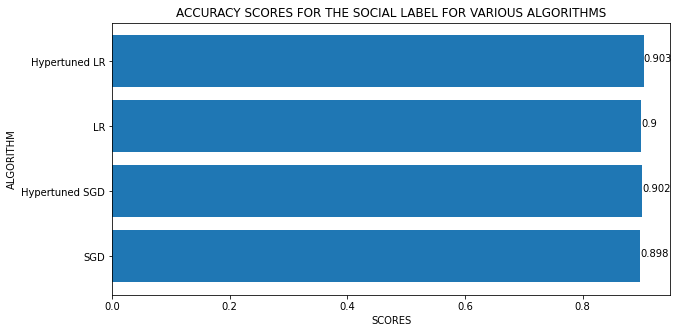

In [110]:
fig = plt.figure()
fig = plt.figure(figsize = (10, 5))
methods = ['SGD', 'Hypertuned SGD', 'LR', 'Hypertuned LR']
scores = [social_result_sgd[0], social_result_sgd_hp[0] , social_result_lr[0], social_result_lr_hp[0]]
plt.ylabel("ALGORITHM")
plt.xlabel("SCORES")
plt.barh(methods,scores)
plt.title("ACCURACY SCORES FOR THE SOCIAL LABEL FOR VARIOUS ALGORITHMS")
for index, value in enumerate(scores):
    plt.text(value, index, str(round(value, 3)))
plt.show()

<Figure size 432x288 with 0 Axes>

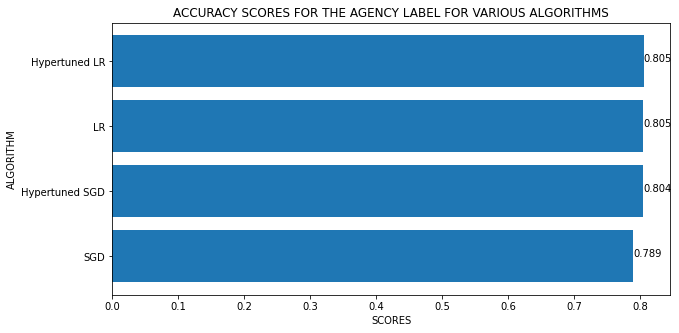

In [111]:
fig = plt.figure()
fig = plt.figure(figsize = (10, 5))
methods = ['SGD', 'Hypertuned SGD','LR', 'Hypertuned LR']
scores = [agency_result_sgd[0], agency_result_sgd_hp[0], agency_result_lr[0], agency_result_lr_hp[0]]
plt.ylabel("ALGORITHM")
plt.xlabel("SCORES")
plt.barh(methods,scores)
plt.title("ACCURACY SCORES FOR THE AGENCY LABEL FOR VARIOUS ALGORITHMS")
best_score = {}
for index, value in enumerate(scores):
    plt.text(value, index, str(round(value, 3)))
plt.show()

## Final Results

 - Hypertuned models did not imporve the overall score for both social and agency labels
 - Logistic Regression outperforms other alogrihtms just marginally, but the plus point here is it's execution speed
 - For the Baseline Classifier we have got the best result for Logistic Regression algorithm
 - We will be using the algorithm with the defaul parameters as the hypertuend model did not improve the score
 - These are the default parameters of the Logistic Regression model :
 
    -penalty='l2',dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None

<Figure size 432x288 with 0 Axes>

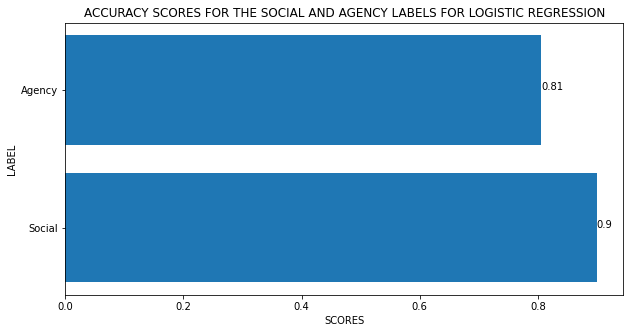

In [116]:
fig = plt.figure()
fig = plt.figure(figsize = (10, 5))
label = ['Social', 'Agency']
scores = [social_result_lr[0], agency_result_lr[0]]
plt.ylabel("LABEL")
plt.xlabel("SCORES")
plt.barh(label,scores)
plt.title("ACCURACY SCORES FOR THE SOCIAL AND AGENCY LABELS FOR LOGISTIC REGRESSION")
for index, value in enumerate(scores):
    plt.text(value, index, str(round(value, 2)))
plt.show()

SOCIAL RESULTS

In [117]:
# Model
lr = LogisticRegression()

# Calling the trainModel to get the results
social_result_lr = trainModel(lr, x_train, y_train_social, x_test, y_test_social, "Social Label")


==== Testing : <class 'sklearn.linear_model._logistic.LogisticRegression'> for Social Label ====
Accuracy : 0.8998547778100494
Precision : 0.9398561778165178
F1_score : 0.9091483979763911
Recall : 0.8803837517860787

===== CONFUSION MATRIX =====
[[6865  552]
 [1172 8626]]


AGENCY RESULTS

In [118]:
agency_result_lr = trainModel(lr, x_train, y_train_agency, x_test, y_test_agency, "Agency Label")


==== Testing : <class 'sklearn.linear_model._logistic.LogisticRegression'> for Agency Label ====
Accuracy : 0.8052860877142027
Precision : 0.8299850074962519
F1_score : 0.8685283966112332
Recall : 0.9108259295820994

===== CONFUSION MATRIX =====
[[ 612 6805]
 [3263 6535]]
